In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("used_cars.csv")
print(df.head())

      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

下面使用replace把price的美元符号和逗号去掉了，然后转换为了int类型

In [12]:
from matplotlib.ticker import MaxNLocator
import re

df['price'] = df['price'].str.replace(',', '', regex=True)
df['price'] = df['price'].str.replace(r'\$', '', regex=True)
df['price'] = df['price'].astype(int)  


print(df['price'].dtype)
print(df.head())



int32
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic  

In [13]:
X = df.drop(columns="price")
y = df["price"]
print(y)

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int32


Text(0, 0.5, 'Price')

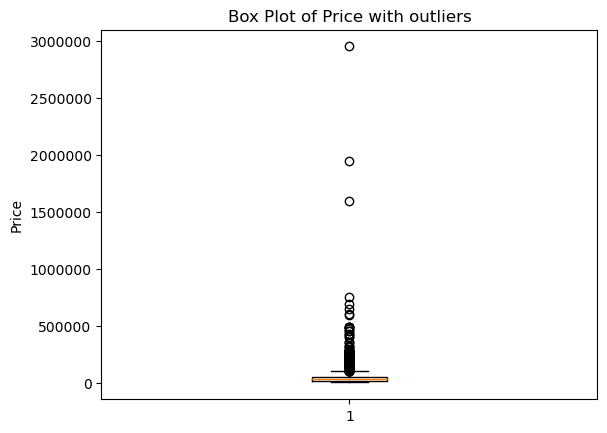

In [14]:
plt.boxplot(y)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Box Plot of Price with outliers")
plt.ylabel("Price")

本数据的outliers相当多，下面使用IQR去除outliers

Text(0, 0.5, 'Price')

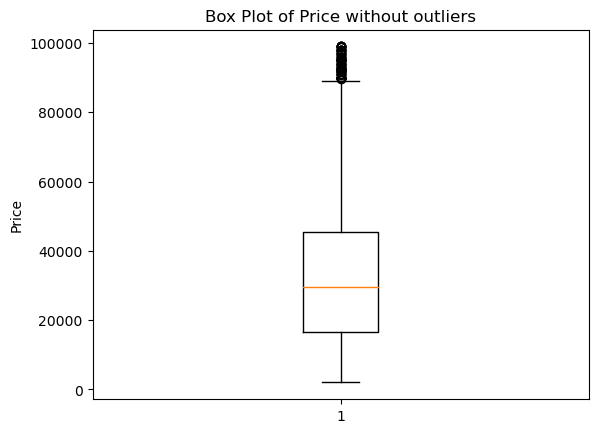

In [15]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
y_no_outliers = df_no_outliers["price"]
plt.boxplot(y_no_outliers)
plt.title("Box Plot of Price without outliers")
plt.ylabel("Price")

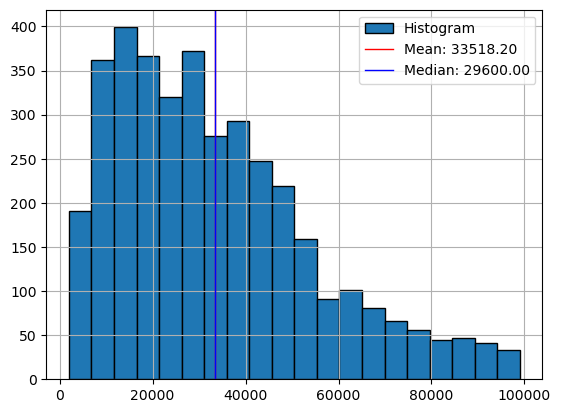

In [26]:
plt.hist(y_no_outliers, bins=20, edgecolor='black', label='Histogram')
plt.ticklabel_format(style='plain', axis='x')
mean_y = np.mean(y_no_outliers)
median_y = np.median(y_no_outliers)
plt.axvline(mean_y, color='red', linewidth=1, label=f'Mean: {mean_y:.2f}')
plt.axvline(mean_y, color='blue', linewidth=1, label=f'Median: {median_y:.2f}')
plt.legend()
plt.grid(True)
plt.show()

去除outlier后数据的平均数和中位数十分接近，虽然不知道有什么用但感觉可以强调这点

原Data存在变量`df`中，想使用已经去除outliers的data请用`df_no_outliers`